https://github.com/henrysky/milkyway_plot

https://github.com/MariusCautun/Milky_Way_mass_profile

In [1]:
!pip install astropy mw_plot

In [25]:
import straxen
straxen.print_versions('numpy astropy mw_plot galpy'.split())

,module,version,path,git
0,python,3.10.4,/home/joran/miniconda3/envs/py3.10/bin/python,None
1,numpy,1.21.6,/home/joran/miniconda3/envs/py3.10/lib/python3...,None
2,astropy,5.0.4,/home/joran/miniconda3/envs/py3.10/lib/python3...,None
3,mw_plot,0.9.0,/home/joran/miniconda3/envs/py3.10/lib/python3...,None
4,galpy,1.7.2,/home/joran/miniconda3/envs/py3.10/lib/python3...,None


In [2]:
import sys

import matplotlib.pyplot as plt

from mw_plot import MWPlot

from astropy import units as  u
import os

import numpy as np

abs_path = '/home/joran/software/thesis/thesis_plots/data/Milky_Way_mass_profile'
if not abs_path in sys.path:
    sys.path.append('/home/joran/software/thesis/thesis_plots/data/Milky_Way_mass_profile')

(0.0, 200000000000.0)

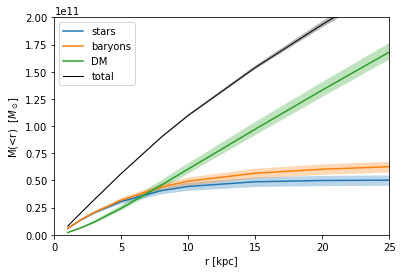

In [3]:


data = np.loadtxt( os.path.join(abs_path, "MW_enclosed_mass_profile.txt"),  )

MW_r_vals = data[:,0]
MW_M_star = data[:,1:4]  # maxium likelihood value; 68% interval (lower and upper bound)
MW_M_bar  = data[:,4:7]
MW_M_DM   = data[:,7:10]
MW_M_total= data[:,10:14]

# import matplotlib.pyplot as plt
# plt.rcParams["figure.figsize"] = (7.5,5)
# plt.rcParams["axes.labelsize"] = 14
# plt.rcParams["xtick.labelsize"] = 12
# plt.rcParams["ytick.labelsize"] = 12
# plt.rcParams["legend.fontsize"] = 14
# plt.rcParams["lines.linewidth"] = 2


plt.fill_between( MW_r_vals, MW_M_star[:,0]+MW_M_star[:,1], MW_M_star[:,0]+MW_M_star[:,2], alpha=0.3 )
plt.plot( MW_r_vals, MW_M_star[:,0], label="stars" )

plt.fill_between( MW_r_vals, MW_M_bar[:,0]+MW_M_bar[:,1], MW_M_bar[:,0]+MW_M_bar[:,2], alpha=0.3 )
plt.plot( MW_r_vals, MW_M_bar[:,0], label="baryons" )

plt.fill_between( MW_r_vals, MW_M_DM[:,0]+MW_M_DM[:,1], MW_M_DM[:,0]+MW_M_DM[:,2], alpha=0.3 )
plt.plot( MW_r_vals, MW_M_DM[:,0], label="DM" )

plt.fill_between( MW_r_vals, MW_M_total[:,0]+MW_M_total[:,1], MW_M_total[:,0]+MW_M_total[:,2], fc='k', alpha=0.3 )
plt.plot( MW_r_vals, MW_M_total[:,0], c="k", lw=1, label="total" )

plt.xlabel( "r [kpc]" )
plt.ylabel( r"M(<r)  $[M_\odot]$" )
plt.legend(  )
plt.xlim(0,25)
plt.ylim(0,2e11)

In [4]:
!pip install galpy

In [5]:
# import the MW best fitting potential as determined by Cautun et al (2020)
from Cautun20_galpy_potential import Cautun20

# Can also import individual potentials: 4 components are available: 
# 1) DM halo, 
# 2) one component represneting all disks: stellar thin + thick, HI and molecular gas disks
# 3) the stellar bulge
# 4) the CGM (i.e. hot gaseous halo)
Cautun_halo, Cautun_Discs, Cautun_Bulge, Cautun_cgm = Cautun20

# Can also import various spherically averaged masses and densities
# All these quanties are in internal galpy units!
# rspace - the (spherical) radial bins at which the quantities are defined
# rho_DM_contracted - the contracted DM density profile
# MassCum_DM_contracted - the enclosed DM mass for the contracted halo
# MassCum_bar - spherically averaged enclosed baryonic mass
# MassCum_DM_uncontracted - the enclosed DM mass before baryonic contraction
from Cautun20_galpy_potential import rspace, rho_DM_contracted, MassCum_DM_contracted, MassCum_bar, MassCum_DM_uncontracted

import numpy as np
import matplotlib.pyplot as plt

/home/joran/miniconda3/envs/py3.10/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)



<Figure size 432x288 with 0 Axes>

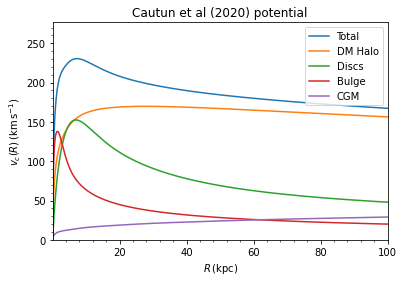

In [6]:
from galpy.potential import plotRotcurve, vcirc

Rmax = 100 #100    # in units of R0
Rrange = [0.01,Rmax]


plt.figure()
plotRotcurve(     Cautun20, label='Total', Rrange=Rrange )
plotRotcurve(  Cautun_halo, label='DM Halo', Rrange=Rrange, overplot=True)
plotRotcurve( Cautun_Discs, label='Discs',  Rrange=Rrange, overplot=True)
plotRotcurve( Cautun_Bulge, label='Bulge', Rrange=Rrange, overplot=True)
plotRotcurve(   Cautun_cgm, label='CGM',   Rrange=Rrange, overplot=True)

plt.title('Cautun et al (2020) potential')
plt.legend()


CPU times: user 8.22 s, sys: 440 ms, total: 8.66 s
Wall time: 8.63 s


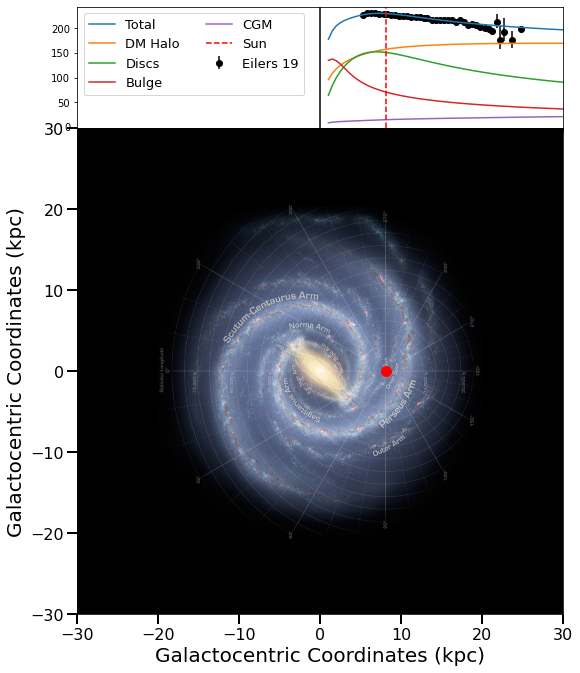

In [23]:
%%time
# setup a mw-plot instance of bird's eyes view of the disc

R0 = 8.122    # Solar position in kpc

mw1 = MWPlot(radius=30 * u.kpc, 
             center=(0, 0)*u.kpc, 
             unit=u.kpc, coord='galactocentric', 
             rot90=0,
             grayscale=False, 
             annotation=True)


# setup subplots with matplotlib

fig, (ax1, ax2) = plt.subplots(2,1, 
                               figsize=(7.5, 7.5*1.25), 
                               sharex=True, 
                               gridspec_kw={"height_ratios": {0.25, 1}
                                            
                                           })
plt.subplots_adjust(
            left=0.05,  # the left side of the subplots of the figure
            right=0.95,  # the right side of the subplots of the figure
            bottom=0.05,  # the bottom of the subplots of the figure
            top=0.95,  # the top of the subplots of the figure
            wspace=1.0,  # the amount of width reserved for blank space between subplots
            hspace=0.0,  # the amount of height reserved for white space between subplots
        )
# transform the whole figure with mw-plot

# mw1.transform(fig) will have the same effect

mw1.transform([ax2])


# you can plot something on top of the transformed subplot

ax2.scatter(R0, 0, c='r', s=100)

# # plot something in the first subplot

# ax1.plot([20, -20], [20, -20])

# ax1.plot([20, -20], [-20, 20])
plt.sca(ax1)
Rmax = 30 #100    # in units of R0
Rrange = [0.01,Rmax]
# plt.figure()

from galpy.potential.mwpotentials import MWPotential2014, McMillan17


# read the Eilers et al (2019) rotation curve data
MW_Vrot_data = np.loadtxt(os.path.join(abs_path, 'MW_rotation_Eilers_2019.txt'))
vdata_r    = MW_Vrot_data[:,0]
vdata_vc   = MW_Vrot_data[:,1]
vdata_vc_u = MW_Vrot_data[:,2]
vdata_vc_l = MW_Vrot_data[:,3]

# compare the various rotation curves with the data

rvals  = np.linspace( 1., 50., 101 )  # kpc

plt.errorbar(vdata_r * u.kpc, 
             vdata_vc,
             yerr=[vdata_vc_l, vdata_vc_u], 
             c='k', 
             label='Eilers 19',
             ls='', 
             zorder=-1,
             marker='o'
            )

plt.plot( rvals * u.kpc, vcirc( Cautun20, rvals/R0, 0 ), label='Total' )
plt.plot( rvals * u.kpc, vcirc( Cautun_halo, rvals/R0, 0 ), label='DM Halo' )
plt.plot( rvals * u.kpc, vcirc( Cautun_Discs, rvals/R0, 0 ), label='Discs' )
plt.plot( rvals * u.kpc, vcirc( Cautun_Bulge, rvals/R0, 0 ), label='Bulge' )
plt.plot( rvals * u.kpc, vcirc( Cautun_cgm, rvals/R0, 0 ), label='CGM' )
# plt.plot( rvals, vcirc( Cautun20, rvals/R0, 0 ), label='Total' )
# plt.plot( rvals, vcirc( Cautun20, rvals/R0, 0 ), label='Total' )
plt.axvline(R0, ls='--', c='r', label='Sun')
plt.axvline(0, ls='-', c='k')
plt.xlim(-30,30)
plt.legend(ncol=2, fontsize=13)